In [82]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tqdm # interactive progress bar

plt.style.use('ggplot')
%matplotlib inline

In [83]:
f_names={'MK':'MK', 'SEGMENT':'Сегмент', 'Service':'Услуга', 'Channeltype': 'Тип канала', 'Source': 'Источник ЕИ', 
'football':'Футбол', 'DECLARED_FAULT':'Заявл. неисправность', 'CREATE_DATE':'Дата создания', 'CLOSETIME':'Дата закрытия',
'all_num_of_repeat':'Всего повторок', 'num_of_repeat2':'Повторок за 2 дня', 'num_of_repeat5':'Повторок за 5 дней',
'num_of_repeat10':'Повторок за 10 дней', 'num_of_repeat30':'Повторок за 30 дней', 'num_of_repeat60':'Повторок за 60 дней',
'MITYPE':'Тип МИ', 'MIPRIORITY':'Приоритет МИ', 'MIIMPACT':'Влияние МИ', 'TECHNICAL_DISTRICT':'Техрайон(WFM)',
'NumWFMforEI':'Кол-во WFM', 'Last_WFM_days_waiting':'Кол-во дней ожидания выезда', 'EIDayOfWeek':'День недели заведения ЕИ',
'EIHourCreate':'Час создания ЕИ'}

In [84]:
print(f_names.keys())

dict_keys(['Service', 'EIDayOfWeek', 'EIHourCreate', 'MITYPE', 'num_of_repeat10', 'NumWFMforEI', 'CLOSETIME', 'football', 'SEGMENT', 'MK', 'all_num_of_repeat', 'Source', 'Channeltype', 'DECLARED_FAULT', 'num_of_repeat2', 'num_of_repeat5', 'Last_WFM_days_waiting', 'num_of_repeat30', 'CREATE_DATE', 'MIPRIORITY', 'TECHNICAL_DISTRICT', 'MIIMPACT', 'num_of_repeat60'])


In [85]:
# help(pd.read_csv)
url_to_data = 'data/data2508_fromAug2017.csv'
data = pd.read_csv(url_to_data, na_values='0', names=['MK','SEGMENT','Service','Channeltype','Source','football',
'DECLARED_FAULT','CREATE_DATE','CLOSETIME','all_num_of_repeat','num_of_repeat2','num_of_repeat5','num_of_repeat10',
'num_of_repeat30','num_of_repeat60','MITYPE','MIPRIORITY','MIIMPACT','TECHNICAL_DISTRICT','NumWFMforEI',
'Last_WFM_days_waiting','EIDayOfWeek','EIHourCreate'], delimiter=';', skiprows=11362)

In [86]:
data.shape

(25976, 23)

In [87]:
# data.columns=['A' + str(i) for i in range(len(data.columns))]
# data.head()

In [88]:
# data.describe()

In [89]:
# extract categorical and numerical features
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('Categorical columns: ', categorical_columns)
print('Numerical columns: ', numerical_columns)

Categorical columns:  ['MK', 'SEGMENT', 'DECLARED_FAULT']
Numerical columns:  ['Service', 'Channeltype', 'Source', 'football', 'CREATE_DATE', 'CLOSETIME', 'all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60', 'MITYPE', 'MIPRIORITY', 'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI', 'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate']


In [90]:
data[numerical_columns].describe()

,Service,Channeltype,Source,football,CREATE_DATE,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
count,25975.000000,23228.000000,25976.000000,25976.000000,2.597600e+04,2.385500e+04,23067.000000,3583.000000,8566.000000,14528.000000,23067.000000,23067.000000,1641.000000,1246.000000,1229.000000,16193.000000,16193.000000,11064.000000,25976.000000,25752.000000
mean,8797.618017,9299.376227,8699.985872,3.754196,1.502970e+09,1.503019e+09,2.155634,1.051354,1.091641,1.128579,1.251875,1.359605,1.174284,3.004013,2.993491,34.897054,1.063793,1.446041,4.072298,14.566519
std,318.374237,333.552572,396.212124,2.067332,4.415688e+05,4.199842e+05,2.684122,0.236619,0.332526,0.410656,0.630334,0.834374,0.543338,0.729736,0.669209,8.985225,0.276409,1.200191,1.662451,4.146103
min,8676.000000,9203.000000,6026.000000,1.000000,1.502199e+09,1.502201e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,-24.000000,1.000000,1.000000
25%,8678.000000,9204.000000,8750.000000,3.000000,1.502616e+09,1.502707e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,29.000000,1.000000,1.000000,3.000000,11.000000
50%,8678.000000,9204.000000,8750.000000,3.000000,1.502963e+09,1.503014e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,36.000000,1.000000,1.000000,4.000000,14.000000
75%,8680.000000,9205.000000,8750.000000,4.000000,1.503393e+09,1.503405e+09,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,41.000000,1.000000,1.000000,5.000000,18.000000
max,9650.000000,10769.000000,10867.000000,35.000000,1.503673e+09,1.503672e+09,98.000000,3.000000,5.000000,7.000000,9.000000,13.000000,6.000000,5.000000,4.000000,64.000000,6.000000,18.000000,7.000000,23.000000


In [91]:
data[categorical_columns].describe() # Stats for categorial features

,MK,SEGMENT,DECLARED_FAULT
count,25815,25960,25976
unique,27,7,212
top,ФЛ,МР,"Телефония. Тишина в трубке, нет зуммера"
freq,19736,20379,2834


In [92]:
#Sparse data
data_nonbinary = pd.get_dummies(data[categorical_columns])


In [93]:
data_nonbinary.head()

,MK_Corporate,MK_Corporate GS,MK_DEFAULT,MK_GS-SLA1,MK_GS-SLA3,MK_GS-SLA4,MK_GS-Имидж абоненты,MK_INDIVIDUAL,MK_KA,MK_KA GS,...,"DECLARED_FAULT_Телефония. Тишина в трубке, нет зуммера","DECLARED_FAULT_Телефония. Шум, треск, эхо",DECLARED_FAULT_Установить переадресацию (авария),DECLARED_FAULT_Ухудшение качества связи,DECLARED_FAULT_ШПД: Нет подключения,DECLARED_FAULT_ШПД: Низкая скорость,DECLARED_FAULT_ШПД: Частые обрывы связи,DECLARED_FAULT_не работает услуга ТВ,DECLARED_FAULT_нет выхода в интернет,DECLARED_FAULT_тестовая предв. диагностика
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# data.describe(include=[object]) # Another way to do the same

In [69]:
## Legends
LEGEND={'Channeltype':{
'9207':'Медная линия',
'9205':'Канальная АТШ',
'9204': 'Канальная PON',
'9986':'Канальная Radio',
'9206':'Кодер видеонаблюдения',
'9636':'IP ОПС',
'9987':'Канальная Радио (юрики)',
'9203':'Канал ADSL',
'9633':'Канальная FTTB',
'9632':'ОПС',
'9202':'Камера видеонаблюдения',
'10769':'Канальная МЕДЬ',
'9197':'RFC PON',
'9198':'RFC АТШ',
'9199':'Интернет PON',
'9200':'Интернет АТШ',
'9201':'Интернет АТШ (юрики)',
'9208':'Телевидение PON',
'9209':'Телевидение АТШ',
'9210':'Телефон PON',
'9211':'Телефон АТШ',
'9212':'УПАТС PON',
'9630':'Телефон FTTB',
'9631':'Телевидение FTTB',
'9634':'Интернет FTTB',
'9635':'RFC FTTB'},
'Service':{
'9650':'Все сервисы',
'9697':'ОПС',
'8677':'Не сетевой инцидент',
'8679':'Телевидение',
'8681':'Технологические сервисы',
'8676':'Дополнительные сервисы',
'8678':'Передача данных',
'8680':'Телефония',
'8682':'Энергетическое и климатическое обеспечение технологических площадок'}}

In [70]:
stats=dict()
stat=dict()
for i in ['MK', 'SEGMENT', 'DECLARED_FAULT', 'Service', 'Channeltype', 'football', 'TECHNICAL_DISTRICT',
          'EIDayOfWeek', 'EIHourCreate']:
    stats[i]=data[i].value_counts()
    stat[i]=pd.Series(stats[i])
# print(stats.keys())
# print(stats['Service'])
stats['Service']

8678.0    13262
8680.0     6709
9650.0     3180
8679.0     2708
8677.0       59
8681.0       33
8676.0       24
Name: Service, dtype: int64

In [71]:
stats['MK'].values

array([19736,  1995,   583,   565,   512,   486,   442,   288,   233,
         146,   143,   135,    97,    96,    83,    56,    54,    53,
          27,    27,    25,    15,     7,     3,     3,     3,     2])

In [72]:
LEGEND['Channeltype'].keys()

dict_keys(['9197', '9208', '9198', '10769', '9632', '9206', '9630', '9987', '9212', '9204', '9202', '9631', '9199', '9200', '9634', '9633', '9635', '9211', '9986', '9203', '9201', '9207', '9210', '9209', '9636', '9205'])

In [73]:
cat_features=set()
for feature in sorted(stats.keys()):
    d_first=20
#     print(len(stats[feature]))
    if len(stats[feature])< 20:
        d_first = len(stats[feature])
    print("\n"+feature+"\n")
    for i in stats[feature].keys()[:d_first]:
        if type(i) == str:
            print(stats[feature][i], "\t", i)
        else:
            cat_features.add(feature)
# print(cat_features)
if cat_features:
    for feature in cat_features:
        try:
            if LEGEND[feature]:
            
                print("\n", feature, "\n")
                for i in stats[feature].keys():
                    print(stats[feature][i], "\t", LEGEND[feature][str(int(i))])
        except:
                pass
#     print(stats[feature].keys()[:d_first], stats[feature].values[:d_first])
    


Channeltype


DECLARED_FAULT

2834 	 Телефония. Тишина в трубке, нет зуммера
2014 	 ONT не на линии. Проблема с оптическим кабелем
1788 	 Телефония. Тишина в трубке
1575 	 Интернет. Не работает интернет
1179 	 Не работает ONT. Нет индикации питания.
1056 	 Интернет. Не открываются все страницы
1030 	 ТВ. Не получен IP-адрес
837 	 ТВ. Черный или синий экран
661 	 ТВ. Проблемы с пультом
540 	 Интернет. Другое
528 	 Телефония. Зуммер занято
518 	 Swap ONT Huawei
509 	 ONT на линии. Высокое затухание
503 	 Перенос/замена модели ONT
503 	 SLX_Не работает INTERNET
480 	 ТВ. Другое
459 	 Интернет. Не открываются страницы
435 	 ТВ. Рассыпание/замирание
392 	 Интернет. Нет линка
355 	 Телефония. Не работает входящая связь

EIDayOfWeek


EIHourCreate


MK

19736 	 ФЛ
1995 	 SOHO
583 	 NKA
565 	 Выделенное обслуживание (пилот)
512 	 SME
486 	 GS-SLA4
442 	 Оператор
288 	 SME GS
233 	 Corporate
146 	 SOHO_GS
143 	 GS-SLA1
135 	 KA
97 	 Corporate GS
96 	 GS-Имидж абоненты
83 	 Имидж-абоненты (физи

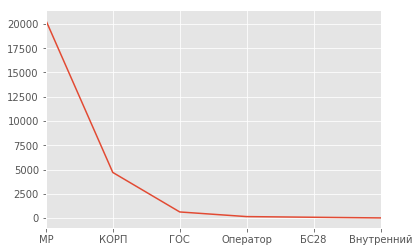

In [74]:
stats['SEGMENT'][:6].plot()

In [75]:
# data.head()

In [96]:
for i in data:
    print(data[i].describe())

count     25815
unique       27
top          ФЛ
freq      19736
Name: MK, dtype: object
count     25960
unique        7
top          МР
freq      20379
Name: SEGMENT, dtype: object
count    25975.000000
mean      8797.618017
std        318.374237
min       8676.000000
25%       8678.000000
50%       8678.000000
75%       8680.000000
max       9650.000000
Name: Service, dtype: float64
count    23228.000000
mean      9299.376227
std        333.552572
min       9203.000000
25%       9204.000000
50%       9204.000000
75%       9205.000000
max      10769.000000
Name: Channeltype, dtype: float64
count    25976.000000
mean      8699.985872
std        396.212124
min       6026.000000
25%       8750.000000
50%       8750.000000
75%       8750.000000
max      10867.000000
Name: Source, dtype: float64
count    25976.000000
mean         3.754196
std          2.067332
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         35.000000
Name: football, dtype:

count    25976.000000
mean         0.000962
std          0.031009
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: MK_ФЛ_ИЗ_МРМ, dtype: float64
count    25976.000000
mean         0.000115
std          0.010746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SEGMENT_БС22, dtype: float64
count    25976.000000
mean         0.003195
std          0.056437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SEGMENT_БС28, dtype: float64
count    25976.000000
mean         0.000577
std          0.024024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SEGMENT_Внутренний, dtype: float64
count    25976.000000
mean         0.024215
std          0.153718
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000

count    25976.000000
mean         0.000346
std          0.018611
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_IPTV. Не отображается меню, dtype: float64
count    25976.000000
mean         0.000500
std          0.022366
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_IPTV. Не показывает часть каналов, dtype: float64
count    25976.000000
mean         0.003195
std          0.056437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_IPTV. Не получен ip-адрес, dtype: float64
count    25976.000000
mean         0.000077
std          0.008774
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_IPTV. Неверный конфиг, dtype: float64
count    25976.000000
mean         0.00

count    25976.000000
mean         0.000077
std          0.008774
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_SLX_Не работает приложение (какое-либо), dtype: float64
count    25976.000000
mean         0.002310
std          0.048006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_SLX_Низкое качество связи через Интернет, dtype: float64
count    25976.000000
mean         0.000077
std          0.008774
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_SLX_Отсутствие некоторых каналов, dtype: float64
count    25976.000000
mean         0.000038
std          0.006205
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_SLX_Плохое качество на одном телевизоре, dtype: fl

count    25976.000000
mean         0.020788
std          0.142678
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Интернет. Другое, dtype: float64
count    25976.000000
mean         0.000308
std          0.017547
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Интернет. Модем не исправен(модем сильно греется, нет питания, LAN-порты не работают и тд), dtype: float64
count    25976.000000
mean         0.000077
std          0.008774
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Интернет. Настройка портов, dtype: float64
count    25976.000000
mean         0.002233
std          0.047201
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Интернет. Не открывается один

count    25976.000000
mean         0.010048
std          0.099735
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Не работает канал VPN, dtype: float64
count    25976.000000
mean         0.000500
std          0.022366
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Не работает канал связи (поток), dtype: float64
count    25976.000000
mean         0.000192
std          0.013873
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Не работает номер, dtype: float64
count    25976.000000
mean         0.003542
std          0.059408
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Не работает прямой провод, dtype: float64
count    25976.000000
mean         0.000346
std   

count    25976.000000
mean         0.001078
std          0.032815
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Телефония. Не работает МН/МГ связь, dtype: float64
count    25976.000000
mean         0.007969
std          0.088914
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Телефония. Не работает ЦАОН, dtype: float64
count    25976.000000
mean         0.013666
std          0.116104
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Телефония. Не работает входящая связь, dtype: float64
count    25976.000000
mean         0.012127
std          0.109453
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DECLARED_FAULT_Телефония. Не работает исходящая связь, dtype: float64
count   

In [97]:
# Cleaning the data
# dropped_data_without_empty_cols = data.dropna(axis=1)
# dropped_data_without_empty_rows = data.dropna(axis=0)
# data.count(axis=0)



for item in ['all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60']:
    data[item]=data[item][data[item].isin([i for i in range(1000)] + [str(i) for i in range(1000)])]
    data[item]=data[item].replace(to_replace=[np.nan], value=[0])

    

# for col_name in ['SERVICE', 'channeltype', 'source']:
#     data[col_name]=data[col_name].replace(to_replace=[np.nan], value=[0])
#     data[col_name]=data[col_name].replace(to_replace=data[col_name].unique(), value=[i for i in range(len(data[col_name].unique()))])



# data['DECLARED_FAULT']=data['DECLARED_FAULT'].replace(to_replace=data['DECLARED_FAULT'].unique(), value=[i for i in range(1,len(data['DECLARED_FAULT'].unique())+1)]) 

# data['CLIENT_CATEGORY']=data['CLIENT_CATEGORY'][data['CLIENT_CATEGORY'].isin(['ФЛ', 'SOHO', 'NKA', 
# 'Выделенное обслуживание (пилот)', 'GS-SLA4', 'SME', 'Оператор', 'SME GS', 'Corporate', 'KA', 'SOHO_GS', 'GS-SLA1', 
# 'Corporate GS', 'GS-Имидж абоненты', 'Имидж-абоненты (физические лица)', 'GS-SLA3', 'INDIVIDUAL', 'KA GS', 'ФЛ_ИЗ_МРМ',
# 'Развитие', 'СПЕЦ', 'Внутренний', 'Посольства', 'Имидж-абоненты (юридические лица)', 'NKA GS'])]
# data['CLIENT_CATEGORY']=data['CLIENT_CATEGORY'].replace(to_replace=data['CLIENT_CATEGORY'].unique(), value=[i for i in range(1,len(data['CLIENT_CATEGORY'].unique())+1)]) 

# data['SEGMENT']=data['SEGMENT'][data['SEGMENT'].isin(['МР','КОРП','ГОС','Оператор','БС28','Внутренний','БС22'])]
# data['SEGMENT']=data['SEGMENT'].replace(to_replace=data['SEGMENT'].unique(), value=[i for i in range(1,len(data['SEGMENT'].unique())+1)]) 


data['DECLARED_FAULT']=data['DECLARED_FAULT'].map(data.groupby('DECLARED_FAULT').size())

data['MK']=data['MK'].map(data.groupby('MK').size())

data['SEGMENT']=data['SEGMENT'].map(data.groupby('SEGMENT').size())



for i in ['CREATE_DATE', 'CLOSETIME']:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [98]:
data['MK'].head()

0    19736.0
1      442.0
2    19736.0
3    19736.0
4    19736.0
Name: MK, dtype: float64

In [99]:
data['CREATE_DATE'].unique()

array([1502199396, 1502199393, 1502199444, ..., 1503672467, 1503672539,
       1503672521])

In [100]:
type(data['CREATE_DATE'].head()[1])

numpy.int64

In [101]:
data_nonbinary.describe()

,MK_Corporate,MK_Corporate GS,MK_DEFAULT,MK_GS-SLA1,MK_GS-SLA3,MK_GS-SLA4,MK_GS-Имидж абоненты,MK_INDIVIDUAL,MK_KA,MK_KA GS,...,"DECLARED_FAULT_Телефония. Тишина в трубке, нет зуммера","DECLARED_FAULT_Телефония. Шум, треск, эхо",DECLARED_FAULT_Установить переадресацию (авария),DECLARED_FAULT_Ухудшение качества связи,DECLARED_FAULT_ШПД: Нет подключения,DECLARED_FAULT_ШПД: Низкая скорость,DECLARED_FAULT_ШПД: Частые обрывы связи,DECLARED_FAULT_не работает услуга ТВ,DECLARED_FAULT_нет выхода в интернет,DECLARED_FAULT_тестовая предв. диагностика
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
mean,0.008970,0.003734,0.000077,0.005505,0.002156,0.01871,0.003696,0.002040,0.005197,0.002079,...,0.109101,0.003388,0.000308,0.000654,0.000346,0.000038,0.000115,0.000038,0.000269,0.000038
std,0.094285,0.060995,0.008774,0.073993,0.046382,0.13550,0.060681,0.045125,0.071905,0.045548,...,0.311772,0.058107,0.017547,0.025574,0.018611,0.006205,0.010746,0.006205,0.016414,0.006205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
# Generation of data
data['decision_time'] = data['CLOSETIME']-data['CREATE_DATE']

In [103]:
data['SEGMENT'].head()

0    20379.0
1     4700.0
2    20379.0
3    20379.0
4    20379.0
Name: SEGMENT, dtype: float64

In [32]:
# # Selecting data
# sel_data = pd.concat((data['CLIENT_CATEGORY'],
# data['SEGMENT'],
# data['SERVICE'],
# data['channeltype'],
# data['source'],
# # data['CHANNELREQUESTID'],
# data['football'],
# data['DECLARED_FAULT'],
# data['all_num_of_repeat'],
# data['num_of_repeat2'],
# data['num_of_repeat5'],
# data['num_of_repeat10'],
# data['num_of_repeat30'],
# data['num_of_repeat60'],
# data['CREATE_DATE'],
# data['CLOSETIME'],
# data['decision_time'],
# # data['TIMELEFTSLA']
#                      ), axis=1)
# sel_data.describe()

In [94]:
data=pd.concat((data, data_nonbinary),axis=1)

In [104]:
print(data['SEGMENT'].unique())
# for i in sel_data['SERVICE']:
#     if i.startswith('2'):
#         pass
#     else:
#         print(i)

[  2.03790000e+04   4.70000000e+03   1.51000000e+02   8.30000000e+01
   6.29000000e+02   3.00000000e+00   1.50000000e+01              nan]


In [37]:
# # full list of categorical columns, where 'nan' is missing values
# for c in sel_data:
#     print(c, sel_data[c].unique(), len(sel_data[c].unique()))

In [38]:
# # for each numerical/quantitative feature built histogram,
# # for each pair of nemerical built dispersion (scattering) diagram
# from pandas.plotting import scatter_matrix
# scatter_matrix(data, alpha=0.05, figsize=(15, 15));

In [39]:
data[numerical_columns].corr() # matrix of correlations

,Service,Channeltype,Source,football,CREATE_DATE,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
Service,1.000000,-0.002728,-0.319197,0.154748,-0.007194,-0.013963,-0.137020,-0.072188,-0.114068,-0.189038,-0.297541,-0.255097,-0.016554,0.375758,0.401450,0.010173,-0.004520,-0.029988,0.011152,-0.078189
Channeltype,-0.002728,1.000000,0.003479,0.118651,-0.013444,0.008666,0.006525,-0.016002,-0.004785,0.003764,0.038965,0.049394,-0.130426,0.073211,0.044206,-0.037250,0.023457,0.025865,-0.009099,0.045365
Source,-0.319197,0.003479,1.000000,-0.118495,-0.006445,0.001246,0.091997,0.048937,0.082894,0.124610,0.196423,0.169847,0.100828,0.012882,-0.001853,0.024538,-0.001748,-0.003687,0.005903,0.042469
football,0.154748,0.118651,-0.118495,1.000000,-0.073842,0.068316,-0.002081,-0.102489,-0.056265,-0.062072,-0.036213,-0.020609,-0.199930,-0.004407,0.023044,0.026248,0.108610,-0.037038,-0.037519,-0.053554
CREATE_DATE,-0.007194,-0.013444,-0.006445,-0.073842,1.000000,0.950083,-0.006342,0.495819,0.674843,0.610337,-0.026435,-0.026740,0.022063,0.022072,0.007766,0.011345,-0.033770,-0.015258,-0.015309,-0.027426
CLOSETIME,-0.013963,0.008666,0.001246,0.068316,0.950083,1.000000,-0.004822,0.380183,0.608331,0.592347,-0.023264,-0.020701,-0.104381,0.008849,-0.021679,0.026400,0.030061,0.053053,-0.080843,0.000387
all_num_of_repeat,-0.137020,0.006525,0.091997,-0.002081,-0.006342,-0.004822,1.000000,0.092050,0.159771,0.219632,0.508369,0.613732,-0.026470,-0.158674,-0.208541,0.009755,0.010896,-0.024395,-0.004933,0.001626
num_of_repeat2,-0.072188,-0.016002,0.048937,-0.102489,0.495819,0.380183,0.092050,1.000000,0.594968,0.387517,0.174983,0.147723,0.159060,-0.123139,-0.141415,-0.006901,-0.025260,-0.003367,0.214519,0.037360
num_of_repeat5,-0.114068,-0.004785,0.082894,-0.056265,0.674843,0.608331,0.159771,0.594968,1.000000,0.670049,0.318857,0.278146,0.046870,-0.113682,-0.147241,0.010162,-0.024405,-0.030897,-0.109661,0.012890
num_of_repeat10,-0.189038,0.003764,0.124610,-0.062072,0.610337,0.592347,0.219632,0.387517,0.670049,1.000000,0.482870,0.424814,0.024056,-0.188843,-0.237455,0.014755,-0.013486,-0.006980,0.054060,0.042741


In [105]:
# Find the number of completed (not skipped) items
# axis = 0 means that we move counter from top to bottom, and axis = 1 than we move counter from left to right
data.count(axis=0)

MK                                                                          25815
SEGMENT                                                                     25960
Service                                                                     25975
Channeltype                                                                 23228
Source                                                                      25976
football                                                                    25976
DECLARED_FAULT                                                              25976
CREATE_DATE                                                                 25976
CLOSETIME                                                                   23855
all_num_of_repeat                                                           25976
num_of_repeat2                                                              25976
num_of_repeat5                                                              25976
num_of_repeat10 

In [106]:
# fill the missing values
# fill all numerical features (Instead of gaps (missing values), we substitute the median values (data.median(axis=0)))
data = data.fillna(0, axis=0)

In [107]:
# before
# data['A1'].describe()

In [108]:
# # fill the missing values in categorical feature with top value (Instead missing values) we substitute 
# # the top value in this column
# data['A1'] = data['A1'].fillna('b')

In [109]:
# result
data.describe()

,MK,SEGMENT,Service,Channeltype,Source,football,DECLARED_FAULT,CREATE_DATE,CLOSETIME,all_num_of_repeat,...,"DECLARED_FAULT_Телефония. Шум, треск, эхо",DECLARED_FAULT_Установить переадресацию (авария),DECLARED_FAULT_Ухудшение качества связи,DECLARED_FAULT_ШПД: Нет подключения,DECLARED_FAULT_ШПД: Низкая скорость,DECLARED_FAULT_ШПД: Частые обрывы связи,DECLARED_FAULT_не работает услуга ТВ,DECLARED_FAULT_нет выхода в интернет,DECLARED_FAULT_тестовая предв. диагностика,decision_time
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,2.597600e+04,2.597600e+04,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,2.597600e+04
mean,15209.290306,16854.758469,8797.279335,8315.595588,8699.985872,3.754196,1006.807823,1.502970e+09,1.380294e+09,1.914229,...,0.003388,0.000308,0.000654,0.000346,0.000038,0.000115,0.000038,0.000269,0.000038,8.843466e+04
std,8059.527732,6763.463544,323.013703,2877.589937,396.212124,2.067332,887.873655,4.415688e+05,4.115862e+08,2.619119,...,0.058107,0.017547,0.025574,0.018611,0.006205,0.010746,0.006205,0.016414,0.006205,1.305153e+05
min,0.000000,0.000000,0.000000,0.000000,6026.000000,1.000000,1.000000,1.502199e+09,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,19736.000000,20379.000000,8678.000000,9204.000000,8750.000000,3.000000,258.000000,1.502616e+09,1.502538e+09,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.875750e+03
50%,19736.000000,20379.000000,8678.000000,9204.000000,8750.000000,3.000000,540.000000,1.502963e+09,1.502965e+09,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.522050e+04
75%,19736.000000,20379.000000,8680.000000,9205.000000,8750.000000,4.000000,1788.000000,1.503393e+09,1.503392e+09,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.642825e+04
max,19736.000000,20379.000000,9650.000000,10769.000000,10867.000000,35.000000,2834.000000,1.503673e+09,1.503672e+09,98.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.390949e+06


In [110]:
try:
    data_describe = data.describe(include=[object])
    data_describe
except:
    pass

In [111]:
# for c in categorical_columns:
#     data[c] = data[c].fillna(data_describe[c]['top'])
# data.describe(include=[object])

In [47]:
# data['DECLARED_FAULT'].unique()

In [48]:
# # devide categorical (non-numerical) columns to binary and nonbinary
# binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
# nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
# print(binary_columns, nonbinary_columns)


In [49]:
# # for non-binary columns|features vectorizing is 1) divide each column to the numbers of unique values in the column
# # 2) and if value exist then only one column's row filled like 1
# # for example, column A4 have 3 unique values: print(data['A4'].unique()) => ['u' 'y' 'l']
# # create 3 new columns: 4_u, A4_y, A4_l
# # If A4 value is 'u', then A4_u = 1, A4_y = 0, A4_l = 0, etc.
# # In Pandas it's performed via using .get_dummies method.

# data_nonbinary = pd.get_dummies(data[nonbinary_columns[6:8]], columns=None) # !!!!!! Limitation 6:10!!!!!!!!!1
# data_nonbinary.columns

In [50]:
# data = data_nonbinary
# data = pd.DataFrame(data, dtype=float)
# print(data.shape)
# print(data.columns)

In [112]:
# Normalization
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,Service,Channeltype,Source,football,CREATE_DATE,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
count,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04
mean,7.877899e-17,1.717820e-16,-1.408995e-15,-9.628543e-17,-7.440238e-15,7.002577e-17,-1.887413e-17,-3.501289e-17,1.750644e-17,2.188305e-17,-3.391873e-17,-6.181963e-17,-7.111992e-18,-6.510208e-17,1.477106e-17,3.829534e-17,8.753221e-18,8.534391e-17,-1.137919e-16,-1.881943e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.723500e+01,-2.889778e+00,-6.748874e+00,-1.332247e+00,-1.744382e+00,-3.353597e+00,-7.308673e-01,-3.887443e-01,-6.573991e-01,-9.878491e-01,-1.558679e+00,-1.348127e+00,-2.342949e-01,-2.178161e-01,-2.172264e-01,-1.186349e+00,-1.184721e+00,-2.321005e+01,-1.848053e+00,-3.325602e+00
25%,-3.692702e-01,3.087321e-01,1.262307e-01,-3.648162e-01,-8.014658e-01,2.970068e-01,-3.490596e-01,-3.887443e-01,-6.573991e-01,-9.878491e-01,-1.565858e-01,-2.315226e-01,-2.342949e-01,-2.178161e-01,-2.172264e-01,-1.186349e+00,-1.184721e+00,-5.807386e-01,-6.450100e-01,-7.924078e-01
50%,-3.692702e-01,3.087321e-01,1.262307e-01,-3.648162e-01,-1.459688e-02,2.980446e-01,-3.490596e-01,-3.887443e-01,-6.573991e-01,5.771892e-01,-1.565858e-01,-2.315226e-01,-2.342949e-01,-2.178161e-01,-2.172264e-01,2.860735e-01,6.017825e-01,-5.807386e-01,-4.348851e-02,-1.015366e-01
75%,-3.630785e-01,3.090796e-01,1.262307e-01,1.188991e-01,9.595912e-01,2.990814e-01,3.274822e-02,-3.887443e-01,1.168780e+00,5.771892e-01,-1.565858e-01,-2.315226e-01,-2.342949e-01,-2.178161e-01,-2.172264e-01,9.404835e-01,6.017825e-01,3.621494e-01,5.580330e-01,8.196249e-01
max,2.639890e+00,8.525900e-01,5.469328e+00,1.511407e+01,1.591783e+00,2.997630e-01,3.668629e+01,7.653217e+00,8.473496e+00,9.967419e+00,1.106016e+01,1.316773e+01,1.871550e+01,7.340279e+00,5.917781e+00,2.303838e+00,9.534298e+00,1.639125e+01,1.761076e+00,1.971077e+00


In [113]:
# data_numerical.head()

In [114]:
X = data.drop(['all_num_of_repeat','CLOSETIME', 'CREATE_DATE'], axis=1)  
y = data['all_num_of_repeat']
feature_names = X.columns
print(feature_names)
fsel_names={'decision_time':'Время решения'}
for i in feature_names:
    if i!= 'decision_time':
        fsel_names[i]=f_names[i]
fsel_names

Index(['MK', 'SEGMENT', 'Service', 'Channeltype', 'Source', 'football',
       'DECLARED_FAULT', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10',
       ...
       'DECLARED_FAULT_Телефония. Шум, треск, эхо',
       'DECLARED_FAULT_Установить переадресацию (авария)',
       'DECLARED_FAULT_Ухудшение качества связи',
       'DECLARED_FAULT_ШПД: Нет подключения',
       'DECLARED_FAULT_ШПД: Низкая скорость',
       'DECLARED_FAULT_ШПД: Частые обрывы связи',
       'DECLARED_FAULT_не работает услуга ТВ',
       'DECLARED_FAULT_нет выхода в интернет',
       'DECLARED_FAULT_тестовая предв. диагностика', 'decision_time'],
      dtype='object', length=267)


KeyError: 'MK_Corporate'

In [115]:
print(X.shape)
print(y.shape)
N, d = X.shape

(25976, 267)
(25976,)


In [116]:
%%time
# Devide for train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)
# X_train, y_train is a training sample, X_test, y_test is a test sample.

19482 6494
CPU times: user 672 ms, sys: 104 ms, total: 776 ms
Wall time: 5.56 s


In [117]:
%%time
# Teach the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: user 976 ms, sys: 52 ms, total: 1.03 s
Wall time: 1.4 s


In [118]:
%%time
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.3614105328 0.46088697259
CPU times: user 31.1 s, sys: 96 ms, total: 31.2 s
Wall time: 31.7 s


In [119]:
# %%time
# from sklearn.model_selection import GridSearchCV
# n_neighbors_array = [1, 3, 5, 7, 10, 15, 20, 40, 60, 235]
# knn = KNeighborsClassifier()
# grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
# grid.fit(X_train, y_train)

# best_cv_err = 1 - grid.best_score_
# best_n_neighbors = grid.best_estimator_.n_neighbors
# print(best_cv_err, best_n_neighbors)

In [120]:
# %%time
# knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
# knn.fit(X_train, y_train)

# err_train = np.mean(y_train != knn.predict(X_train))
# err_test  = np.mean(y_test  != knn.predict(X_test))
# print(err_train, err_test)

In [121]:
# %%time
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [122]:
# %%time
# from sklearn.model_selection import GridSearchCV
# C_array = np.logspace(-3, 3, num=7)
# gamma_array = np.logspace(-5, 2, num=8)
# svc = SVC(kernel='rbf')
# grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'n'})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)
# print('best gamma  = ', grid.best_estimator_.gamma)

In [123]:
# %%time
# svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [124]:
# %%time
# from sklearn.model_selection import GridSearchCV
# C_array = np.logspace(-3, 3, num=7)
# svc = SVC(kernel='linear')
# grid = GridSearchCV(svc, param_grid={'C': C_array})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)

In [125]:
# %%time
# svc = SVC(kernel='linear', C=grid.best_estimator_.C)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [126]:
# %%time
# from sklearn.grid_search import GridSearchCV
# C_array = np.logspace(-5, 2, num=8)
# gamma_array = np.logspace(-5, 2, num=8)
# degree_array = [2, 3, 4]
# svc = SVC(kernel='poly')
# grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)
# print('best gamma  = ', grid.best_estimator_.gamma)
# print('best degree = ', grid.best_estimator_.degree)

In [127]:
# %%time
# svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
#           gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [128]:
%%time
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=2, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.147315470691 0.360024638128
CPU times: user 700 ms, sys: 92 ms, total: 792 ms
Wall time: 1.26 s


In [129]:
%%time
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'decision_time' (0.1203)
 2. feature 'num_of_repeat30' (0.1140)
 3. feature 'EIHourCreate' (0.0939)
 4. feature 'TECHNICAL_DISTRICT' (0.0726)
 5. feature 'num_of_repeat60' (0.0674)
 6. feature 'EIDayOfWeek' (0.0643)
 7. feature 'num_of_repeat10' (0.0533)
 8. feature 'MK_ФЛ' (0.0436)
 9. feature 'Channeltype' (0.0360)
10. feature 'NumWFMforEI' (0.0309)
11. feature 'football' (0.0309)
12. feature 'Service' (0.0294)
13. feature 'SEGMENT' (0.0293)
14. feature 'DECLARED_FAULT' (0.0249)
15. feature 'num_of_repeat5' (0.0245)
16. feature 'Last_WFM_days_waiting' (0.0242)
17. feature 'Source' (0.0164)
18. feature 'num_of_repeat2' (0.0086)
19. feature 'DECLARED_FAULT_Телефония. Тишина в трубке, нет зуммера' (0.0070)
20. feature 'MK   ' (0.0044)
21. feature 'MITYPE' (0.0041)
22. feature 'DECLARED_FAULT_ТВ. Черный или синий экран' (0.0038)
23. feature 'DECLARED_FAULT_Интернет. Не работает интернет' (0.0037)
24. feature 'DECLARED_FAULT_Телефония. Тишина в трубке' (0.

In [130]:
feature_arr_names = [i for i in fsel_names.values()]
np.array(feature_arr_names)[:d_first]
# d_first

array(['Услуга', 'Техрайон(WFM)', 'Источник ЕИ',
       'Кол-во дней ожидания выезда', 'День недели заведения ЕИ',
       'Время решения', 'Влияние МИ', 'Час создания ЕИ',
       'Заявл. неисправность', 'Повторок за 2 дня', 'Тип МИ', 'Тип канала',
       'Повторок за 10 дней', 'Повторок за 30 дней', 'Кол-во WFM',
       'Приоритет МИ', 'Повторок за 60 дней', 'Футбол',
       'Повторок за 5 дней', 'Сегмент'],
      dtype='<U27')

IndexError: index 266 is out of bounds for axis 1 with size 21

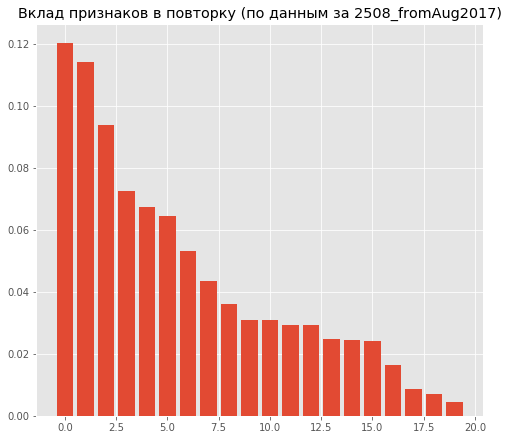

In [131]:
# %%time

data_period = url_to_data.split('.')[0].split('/')[1][4:]

plt.subplots_adjust(left=0.15)
d_first = 20
plt.figure(figsize=(8, 8)).autofmt_xdate() 
plt.title("Вклад признаков в повторку (по данным за {0})".format(data_period))
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_arr_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])
plt.savefig("FeaturesImportances{0}.pdf".format(data_period))

In [133]:
%%time
print(len(feature_names))
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

267
Index(['decision_time', 'num_of_repeat30', 'EIHourCreate',
       'TECHNICAL_DISTRICT', 'num_of_repeat60', 'EIDayOfWeek',
       'num_of_repeat10', 'MK_ФЛ'],
      dtype='object')
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.54 ms


In [134]:
%%time
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print(err_train, err_test)

0.260240221743 0.289344009855
CPU times: user 15min 20s, sys: 296 ms, total: 15min 20s
Wall time: 15min 25s


In [135]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print(err_train, err_test)

0.269633507853 0.293039728981
CPU times: user 6min 45s, sys: 52 ms, total: 6min 45s
Wall time: 6min 45s


In [ ]:
# pd.plotting.scatter_matrix(X)